In [5]:
import os
try:
    import patoolib
except:
    !pip install patool

path = '..\\3. Dataset\\AI Specialist Lesson 04\\'
if not os.path.exists(path):
    patoolib.extract_archive('..\\3. Dataset\\AI Specialist Lesson 04.rar')

os.chdir(path)

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image
import warnings
warnings.filterwarnings("ignore")

In [8]:
pokemon = pd.read_csv("pokemon.csv")
combat = pd.read_csv("combats.csv")

print(pokemon.shape)
print(pokemon.shape)

display(pokemon.head())
display(combat.head())

(800, 12)
(800, 12)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [11]:
display(pokemon.isnull().sum())
print("="*50)
display(combat.isnull().sum())

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [15]:
idx = pokemon[pokemon["Name"].isnull()].index.item()
idx

62

In [16]:
display(pokemon.loc[idx - 2: idx + 2])

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
60,61,Golduck,Water,NaN,80,82,78,95,80,85,1,False
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
64,65,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False


In [17]:
pokemon.loc[idx, "Name"] = "Primeape"
display(pokemon.loc[idx - 2: idx + 2])

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
60,61,Golduck,Water,NaN,80,82,78,95,80,85,1,False
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False
62,63,Primeape,Fighting,NaN,65,105,60,60,70,95,1,False
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
64,65,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False


In [22]:
WinStatsDF = pd.DataFrame(columns=["Pokedex", "Total_Fights", "Total_Wins", "Win_Percent"], dtype=object)
WinStatsDF.head()

,Pokedex,Total_Fights,Total_Wins,Win_Percent


In [31]:
combat.groupby("First_pokemon").count().head()

,Second_pokemon,Winner
First_pokemon,,
1,70,70
2,55,55
3,68,68
4,62,62
5,50,50


In [26]:
total_fights = combat.groupby("First_pokemon").count() + combat.groupby("Second_pokemon").count()
total_fights.head()

,First_pokemon,Second_pokemon,Winner
First_pokemon,,,
1,NaN,NaN,133
2,NaN,NaN,121
3,NaN,NaN,132
4,NaN,NaN,125
5,NaN,NaN,112


In [25]:
total_fights = combat.groupby("First_pokemon").count() + combat.groupby("Second_pokemon").count()
WinStatsDF['Pokedex'] = total_fights.index
WinStatsDF['Total_Fights'] = total_fights["Winner"].values
WinStatsDF.head()

,Pokedex,Total_Fights,Total_Wins,Win_Percent
0,1,133,NaN,NaN
1,2,121,NaN,NaN
2,3,132,NaN,NaN
3,4,125,NaN,NaN
4,5,112,NaN,NaN


In [33]:
WinnerCountSeries = combat["Winner"].value_counts().sort_index()
WinnerCountSeries

1       37
2       46
3       89
4       70
5       55
      ... 
796     39
797    116
798     60
799     89
800     75
Name: Winner, Length: 783, dtype: int64

In [35]:
WinStatsDF['Total_Wins'] = WinStatsDF["Pokedex"].apply(lambda idx: WinnerCountSeries[idx] if idx in WinnerCountSeries.index else 0)

WinStatsDF["Win_Percent"] = WinStatsDF["Total_Wins"] / WinStatsDF["Total_Fights"]

WinStatsDF.head()

,Pokedex,Total_Fights,Total_Wins,Win_Percent
0,1,133,37,0.278195
1,2,121,46,0.380165
2,3,132,89,0.674242
3,4,125,70,0.560000
4,5,112,55,0.491071


In [36]:
data = pd.merge(pokemon, WinStatsDF, left_on="#", right_on="Pokedex")
print(data.shape)
display(data.head())

(784, 16)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Pokedex,Total_Fights,Total_Wins,Win_Percent
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1,133,37,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2,121,46,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3,132,89,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,4,125,70,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,5,112,55,0.491071


Text(0.5, 1.0, 'Total Pokemon by Type 1')

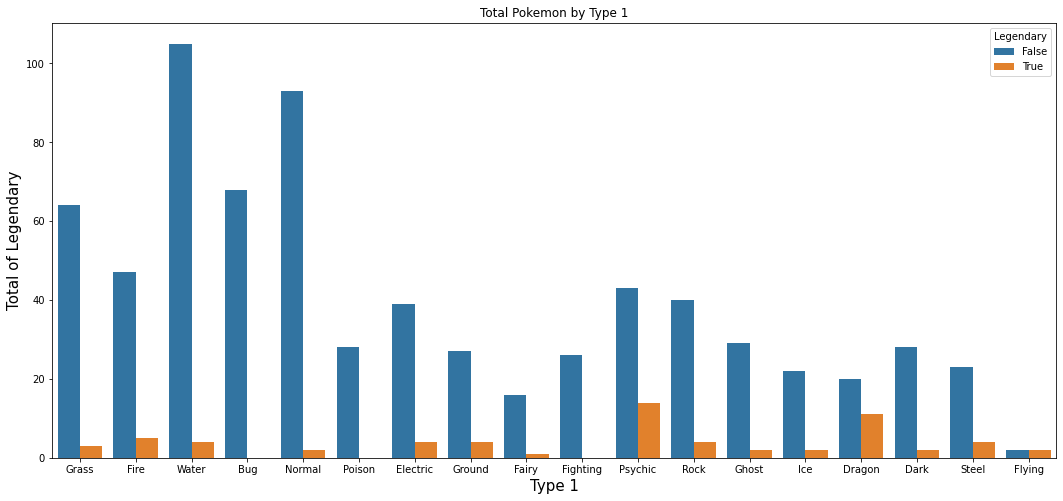

In [37]:
plt.figure(figsize = (18, 8))
sns.countplot(x = "Type 1", hue = "Legendary", data = data)  
plt.xlabel("Type 1", size = 15)
plt.ylabel("Total of Legendary", size = 15)
plt.title("Total Pokemon by Type 1")

In [38]:
result = data[data["Legendary"] == True]
table = pd.crosstab(result['Type 1'], result['Type 2'].fillna('N/A'))
display(table)

Type 2,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Ground,Ice,N/A,Psychic,Steel,Water
Type 1,,,,,,,,,,,,,,
Dark,0,0,0,0,0,0,1,0,0,0,1,0,0,0
Dragon,0,0,1,0,0,1,2,0,1,3,0,3,0,0
Electric,0,0,0,0,0,0,3,0,0,0,1,0,0,0
Fairy,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Fire,0,0,0,0,0,0,2,0,0,0,1,0,1,1
Flying,0,0,0,0,0,0,0,0,0,0,2,0,0,0
Ghost,0,2,0,0,0,0,0,0,0,0,0,0,0,0
Grass,0,0,0,0,1,0,1,0,0,0,1,0,0,0
Ground,0,0,0,0,0,1,2,0,0,0,1,0,0,0


In [40]:
data = data[["#", "Name", "Type 1", "Type 2", "HP", "Attack", 
             "Defense", "Sp. Atk", "Sp. Def", "Speed",  "Generation",  "Legendary",  "Win_Percent"]]
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win_Percent
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,0.491071


In [41]:
StatsDF = data.corr()
StatsDF.style.background_gradient(cmap = "coolwarm")

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win_Percent
#,1.000000,0.103511,0.105296,0.095125,0.089596,0.081203,0.009309,0.983282,0.154566,0.061200
HP,0.103511,1.000000,0.420464,0.248069,0.366261,0.385570,0.183813,0.062361,0.280315,0.261602
Attack,0.105296,0.420464,1.000000,0.442344,0.398339,0.265884,0.385933,0.052824,0.348178,0.502825
Defense,0.095125,0.248069,0.442344,1.000000,0.221042,0.508399,0.011475,0.042117,0.242051,0.114565
Sp. Atk,0.089596,0.366261,0.398339,0.221042,1.000000,0.503077,0.473344,0.036614,0.447989,0.481445
Sp. Def,0.081203,0.385570,0.265884,0.508399,0.503077,1.000000,0.254372,0.023787,0.357186,0.302422
Speed,0.009309,0.183813,0.385933,0.011475,0.473344,0.254372,1.000000,-0.026175,0.323255,0.938055
Generation,0.983282,0.062361,0.052824,0.042117,0.036614,0.023787,-0.026175,1.000000,0.079847,0.022987
Legendary,0.154566,0.280315,0.348178,0.242051,0.447989,0.357186,0.323255,0.079847,1.000000,0.324935
Win_Percent,0.061200,0.261602,0.502825,0.114565,0.481445,0.302422,0.938055,0.022987,0.324935,1.000000


In [44]:
thresh = 0.25 
SelectedFeatures = list(StatsDF[StatsDF.loc["Win_Percent"] > thresh].index)
print(f"Selected Features with at least correlation {thresh} : {SelectedFeatures}")
data = data[SelectedFeatures]
data.head()

Selected Features with at least correlation 0.25 : ['HP', 'Attack', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary', 'Win_Percent']


,HP,Attack,Sp. Atk,Sp. Def,Speed,Legendary,Win_Percent
0,45,49,65,65,45,False,0.278195
1,60,62,80,80,60,False,0.380165
2,80,82,100,100,80,False,0.674242
3,80,100,122,120,80,False,0.560000
4,39,52,60,50,65,False,0.491071


In [45]:
StatsDF = data.corr()
StatsDF.style.background_gradient(cmap = "coolwarm")

,HP,Attack,Sp. Atk,Sp. Def,Speed,Legendary,Win_Percent
HP,1.000000,0.420464,0.366261,0.385570,0.183813,0.280315,0.261602
Attack,0.420464,1.000000,0.398339,0.265884,0.385933,0.348178,0.502825
Sp. Atk,0.366261,0.398339,1.000000,0.503077,0.473344,0.447989,0.481445
Sp. Def,0.385570,0.265884,0.503077,1.000000,0.254372,0.357186,0.302422
Speed,0.183813,0.385933,0.473344,0.254372,1.000000,0.323255,0.938055
Legendary,0.280315,0.348178,0.447989,0.357186,0.323255,1.000000,0.324935
Win_Percent,0.261602,0.502825,0.481445,0.302422,0.938055,0.324935,1.000000


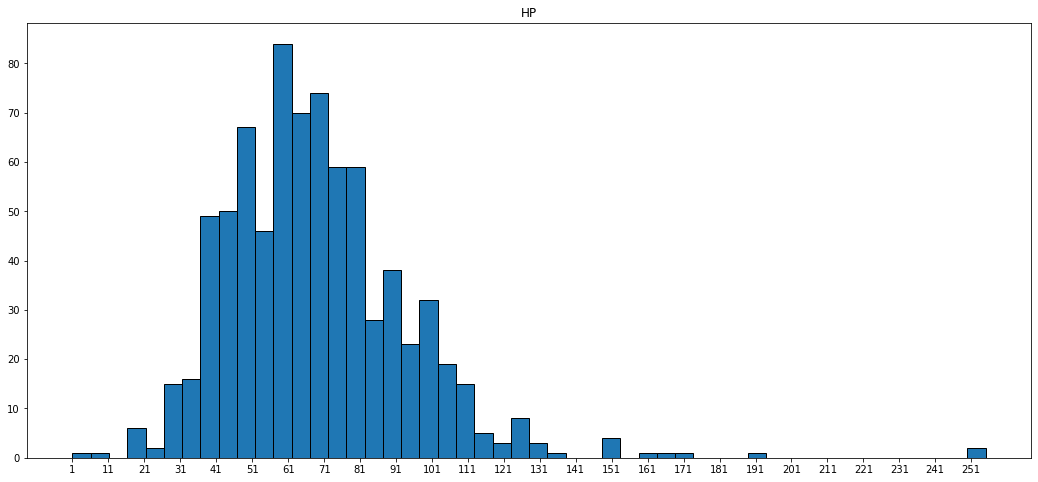

In [49]:
col = "HP"
arr = np.array(data[col])

plt.figure(figsize = (18, 8))
plt.title(col)
hist = plt.hist(arr, bins = 50,  ec = "black")
plt.xticks(np.arange(min(arr), max(arr), 10.0))
plt.show()

In [50]:
data_HP = data[["HP", "Win_Percent"]]
data_HP.head()

,HP,Win_Percent
0,45,0.278195
1,60,0.380165
2,80,0.674242
3,80,0.560000
4,39,0.491071


In [51]:
bins = [1 , 26,  31.48,  36.56, 41.64,  46.72,  51.8 ,  56.88,  61.96,  67.04,  72.12,  77.2 , 82.28,  87.36,  92.44,  97.52, 102.6 , 107.68, 112.76, 117.84, 122.92, 128. , 133.08, 138.16 , 255]

col = "HP"
data_HP[col + "_q_Adpt"] = pd.cut(arr, bins).astype(np.object)
data_HP.head()

,HP,Win_Percent,HP_q_Adpt
0,45,0.278195,"(41.64, 46.72]"
1,60,0.380165,"(56.88, 61.96]"
2,80,0.674242,"(77.2, 82.28]"
3,80,0.560000,"(77.2, 82.28]"
4,39,0.491071,"(36.56, 41.64]"


In [54]:
HPMeanDict = data_HP.groupby("HP_q_Adpt")["HP"].mean()
HPMeanDict

HP_q_Adpt
(1.0, 26.0]          20.000000
(26.0, 31.48]        29.933333
(31.48, 36.56]       35.062500
(36.56, 41.64]       39.714286
(41.64, 46.72]       44.740000
(46.72, 51.8]        49.910448
(51.8, 56.88]        54.717391
(56.88, 61.96]       59.761905
(61.96, 67.04]       64.714286
(67.04, 72.12]       69.972973
(72.12, 77.2]        74.966102
(77.2, 82.28]        79.677966
(82.28, 87.36]       84.857143
(87.36, 92.44]       90.105263
(92.44, 97.52]       95.086957
(97.52, 102.6]      100.000000
(102.6, 107.68]     104.894737
(107.68, 112.76]    109.466667
(112.76, 117.84]    115.000000
(117.84, 122.92]    120.000000
(122.92, 128.0]     124.750000
(128.0, 133.08]     130.000000
(133.08, 138.16]    135.000000
(138.16, 255.0]     179.000000
Name: HP, dtype: float64

In [55]:
data_HP["HP_Adj"] = data_HP["HP_q_Adpt"].map(HPMeanDict)
data_HP.head()

,HP,Win_Percent,HP_q_Adpt,HP_Adj
0,45,0.278195,"(41.64, 46.72]",44.740000
1,60,0.380165,"(56.88, 61.96]",59.761905
2,80,0.674242,"(77.2, 82.28]",79.677966
3,80,0.560000,"(77.2, 82.28]",79.677966
4,39,0.491071,"(36.56, 41.64]",39.714286


In [56]:
StatsDF = data_HP.corr()
StatsDF.style.background_gradient(cmap = "coolwarm")

,HP,Win_Percent,HP_Adj
HP,1.000000,0.261602,0.984325
Win_Percent,0.261602,1.000000,0.277312
HP_Adj,0.984325,0.277312,1.000000


In [57]:
for bins in range(3, 15):
    bin_group = col + "_fixW_" + str(bins)
    data_HP[bin_group] = pd.qcut(arr, q=bins).astype(np.object)
    HPMeanDict = data_HP.groupby(bin_group)["HP"].mean()
    bin_feature = "HP" + f"_{bins}"
    data_HP[bin_feature] = data_HP[bin_group].map(HPMeanDict)

data_HP.head()

,HP,Win_Percent,HP_q_Adpt,HP_Adj,HP_fixW_3,HP_3,HP_fixW_4,HP_4,HP_fixW_5,HP_5,...,HP_fixW_10,HP_10,HP_fixW_11,HP_11,HP_fixW_12,HP_12,HP_fixW_13,HP_13,HP_fixW_14,HP_14
0,45,0.278195,"(41.64, 46.72]",44.740000,"(0.999, 59.0]",45.134831,"(0.999, 50.0]",42.072816,"(0.999, 50.0]",42.072816,...,"(40.0, 50.0]",47.504202,"(40.0, 49.0]",44.879310,"(40.0, 45.0]",44.470588,"(40.0, 45.0]",44.470588,"(40.0, 45.0]",44.470588
1,60,0.380165,"(56.88, 61.96]",59.761905,"(59.0, 75.0]",66.883019,"(50.0, 65.0]",60.025907,"(50.0, 60.0]",57.826772,...,"(55.0, 60.0]",59.654321,"(54.0, 60.0]",58.194915,"(59.0, 60.0]",60.000000,"(55.0, 60.0]",59.654321,"(55.0, 60.0]",59.654321
2,80,0.674242,"(77.2, 82.28]",79.677966,"(75.0, 255.0]",96.753968,"(65.0, 80.0]",74.060914,"(70.0, 86.8]",78.348387,...,"(78.1, 86.8]",81.730769,"(75.0, 80.0]",79.171875,"(75.0, 80.0]",79.171875,"(78.0, 84.0]",80.290909,"(75.0, 80.0]",79.171875
3,80,0.560000,"(77.2, 82.28]",79.677966,"(75.0, 255.0]",96.753968,"(65.0, 80.0]",74.060914,"(70.0, 86.8]",78.348387,...,"(78.1, 86.8]",81.730769,"(75.0, 80.0]",79.171875,"(75.0, 80.0]",79.171875,"(78.0, 84.0]",80.290909,"(75.0, 80.0]",79.171875
4,39,0.491071,"(36.56, 41.64]",39.714286,"(0.999, 59.0]",45.134831,"(0.999, 50.0]",42.072816,"(0.999, 50.0]",42.072816,...,"(0.999, 40.0]",34.643678,"(0.999, 40.0]",34.643678,"(0.999, 40.0]",34.643678,"(0.999, 40.0]",34.643678,"(0.999, 40.0]",34.643678


In [58]:
StatsDF = data_HP.corr()
StatsDF.style.background_gradient(cmap = "coolwarm")

,HP,Win_Percent,HP_Adj,HP_3,HP_4,HP_5,HP_6,HP_7,HP_8,HP_9,HP_10,HP_11,HP_12,HP_13,HP_14
HP,1.000000,0.261602,0.984325,0.829453,0.872050,0.888005,0.904684,0.917497,0.920433,0.932583,0.933641,0.934959,0.935526,0.937878,0.943175
Win_Percent,0.261602,1.000000,0.277312,0.333381,0.298571,0.308210,0.315046,0.314749,0.309200,0.300081,0.296735,0.300542,0.301772,0.299976,0.298222
HP_Adj,0.984325,0.277312,1.000000,0.841363,0.885674,0.902447,0.918075,0.932163,0.934546,0.946785,0.948284,0.949247,0.949884,0.952304,0.957789
HP_3,0.829453,0.333381,0.841363,1.000000,0.907867,0.906004,0.916843,0.890884,0.884864,0.889414,0.884133,0.880537,0.886616,0.880907,0.878170
HP_4,0.872050,0.298571,0.885674,0.907867,1.000000,0.961524,0.937739,0.938820,0.947435,0.923991,0.927939,0.931689,0.932150,0.928446,0.924590
HP_5,0.888005,0.308210,0.902447,0.906004,0.961524,1.000000,0.952786,0.952445,0.953326,0.949118,0.951120,0.943517,0.943828,0.942217,0.940042
HP_6,0.904684,0.315046,0.918075,0.916843,0.937739,0.952786,1.000000,0.968698,0.963916,0.951851,0.953011,0.964232,0.967032,0.962061,0.954071
HP_7,0.917497,0.314749,0.932163,0.890884,0.938820,0.952445,0.968698,1.000000,0.989105,0.964466,0.965176,0.972809,0.974311,0.973051,0.972775
HP_8,0.920433,0.309200,0.934546,0.884864,0.947435,0.953326,0.963916,0.989105,1.000000,0.969704,0.971113,0.977237,0.977324,0.975753,0.974795
HP_9,0.932583,0.300081,0.946785,0.889414,0.923991,0.949118,0.951851,0.964466,0.969704,1.000000,0.996376,0.992418,0.993653,0.989812,0.984935


In [60]:
bestHPFeature = StatsDF.loc["Win_Percent"].sort_values(ascending=False).keys()[1]
bestHPFeature

'HP_3'

In [61]:
data["HP"] = data_HP[bestHPFeature]
data.head()

,HP,Attack,Sp. Atk,Sp. Def,Speed,Legendary,Win_Percent
0,45.134831,49,65,65,45,False,0.278195
1,66.883019,62,80,80,60,False,0.380165
2,96.753968,82,100,100,80,False,0.674242
3,96.753968,100,122,120,80,False,0.560000
4,45.134831,52,60,50,65,False,0.491071


In [63]:
StatsDF = data.corr()
StatsDF.style.background_gradient(cmap = "coolwarm")

,HP,Attack,Sp. Atk,Sp. Def,Speed,Legendary,Win_Percent
HP,1.000000,0.490103,0.427409,0.424543,0.257916,0.303632,0.333381
Attack,0.490103,1.000000,0.398339,0.265884,0.385933,0.348178,0.502825
Sp. Atk,0.427409,0.398339,1.000000,0.503077,0.473344,0.447989,0.481445
Sp. Def,0.424543,0.265884,0.503077,1.000000,0.254372,0.357186,0.302422
Speed,0.257916,0.385933,0.473344,0.254372,1.000000,0.323255,0.938055
Legendary,0.303632,0.348178,0.447989,0.357186,0.323255,1.000000,0.324935
Win_Percent,0.333381,0.502825,0.481445,0.302422,0.938055,0.324935,1.000000


In [64]:
data.isnull().sum()

HP             0
Attack         0
Sp. Atk        0
Sp. Def        0
Speed          0
Legendary      0
Win_Percent    0
dtype: int64

In [65]:
dataset = data.copy()

In [66]:
trainCols = ["HP", "Attack",  "Sp. Atk", "Sp. Def", "Speed",  "Legendary"]
target = "Win_Percent"

In [67]:
X = dataset[trainCols].values
y = dataset[target].values

print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(784, 6) (784,)
(627, 6) (627,)
(157, 6) (157,)


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

regressior = LinearRegression()
regressior.fit(X_train, y_train)
y_pred = regressior.predict(X_test)

print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"Acc : {regressior.score(X_test, y_test)}")
print(f"R2 : {r2_score(y_test, y_pred)}")

MAE : 0.06189147244035167
Acc : 0.8972510571029771
R2 : 0.8972510571029771


In [69]:
from sklearn.ensemble import RandomForestRegressor
regressior = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressior.fit(X_train, y_train)
y_pred = regressior.predict(X_test)

print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"Acc : {regressior.score(X_test, y_test)}")

MAE : 0.0483823020378442
Acc : 0.9308988665848016


In [70]:
from sklearn.tree import DecisionTreeRegressor
regressior = DecisionTreeRegressor(random_state = 0)
regressior.fit(X_train, y_train)
y_pred = regressior.predict(X_test)

print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"Acc : {regressior.score(X_test, y_test)}")

MAE : 0.058600276874785424
Acc : 0.907645752873103
